In [ ]:
from IPython.display import clear_output
!wget https://disk.karelia.pro/djnSMfz/Трек%201.%20Онежское%20озеро.tgz?attachment
import os
try:
    os.mkdir("./data")
except: pass
!tar -xvzf "Трек 1. Онежское озеро.tgz?attachment" -C ./data
clear_output()

In [ ]:
from joblib import Parallel, delayed
import os
from PIL import Image

size = (800, 800)
def resize_and_save(name):
    im = Image.open(f"/content/data/{name}")
    out = im.resize(size)
    out.save(f'./data_resized/{name}')

try:
    os.mkdir("./data_resized")
except: pass

Parallel(n_jobs=-1,
         verbose=1,
         backend="multiprocessing")(delayed(resize_and_save)(name)
         for name in os.listdir("./data"))
print()

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3164 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4964 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 7164 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 9764 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 12764 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 16164 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 19964 tasks      | elapsed: 11.8min


[Parallel(n_jobs=-1)]: Done 20325 out of 20325 | elapsed: 12.1min finished


In [ ]:
# переводим дату в числа
def date_to_data(frame, holidays=None,
                 drop=False, name="date", suffix=""):
    assert name in frame, "Нужна колонка с датой"
    date = frame[name].dt

    info = pd.concat([date.days_in_month,
                     date.month,
                     date.quarter,
                     date.month % 12 // 3 + 1,
                     date.hour], axis=1)
    
    info.columns = ["days_in_month", "month",
                    "quarter", "season", "hour"]

    temp = pd.concat([date.isocalendar(),
                      info], axis=1)

    temp.columns = temp.columns + suffix
    frame = pd.concat([frame, temp], axis=1)
    if drop:
        return frame.drop([name], axis=1)
    return frame

In [ ]:
import pandas as pd
df = pd.DataFrame(os.listdir("./data"), columns=["name"])
df["time_parsed"] = pd.to_datetime(df["name"].apply(lambda x: x[:-4]))
df = df.sort_values(by="time_parsed")
df = date_to_data(df, name="time_parsed")
df["date"] = df["time_parsed"].dt.date

In [ ]:
df[(df["season"] == 1) & (df["hour"].isin([10, 12, 14]))][:50]

,name,time_parsed,year,week,day,days_in_month,month,quarter,season,hour,date
7152,201612011000.jpg,2016-12-01 10:00:00,2016,48,4,31,12,4,1,10,2016-12-01
5425,201612011200.jpg,2016-12-01 12:00:00,2016,48,4,31,12,4,1,12,2016-12-01
8688,201612011400.jpg,2016-12-01 14:00:00,2016,48,4,31,12,4,1,14,2016-12-01
1307,201612021000.jpg,2016-12-02 10:00:00,2016,48,5,31,12,4,1,10,2016-12-02
13291,201612021200.jpg,2016-12-02 12:00:00,2016,48,5,31,12,4,1,12,2016-12-02
6712,201612021400.jpg,2016-12-02 14:00:00,2016,48,5,31,12,4,1,14,2016-12-02
6476,201612031000.jpg,2016-12-03 10:00:00,2016,48,6,31,12,4,1,10,2016-12-03
2221,201612031200.jpg,2016-12-03 12:00:00,2016,48,6,31,12,4,1,12,2016-12-03
7823,201612031400.jpg,2016-12-03 14:00:00,2016,48,6,31,12,4,1,14,2016-12-03
12204,201612041000.jpg,2016-12-04 10:00:00,2016,48,7,31,12,4,1,10,2016-12-04


In [ ]:
# from zipfile import ZipFile
# with ZipFile("winter.zip", "w") as f:
#     for name in df[df["season"] == 1].name:
#         f.write(f"./data_resized/{name}")

In [ ]:
df[df["date"] == pd.to_datetime("2016-12-01")].name

2020-03-18 14:00:00


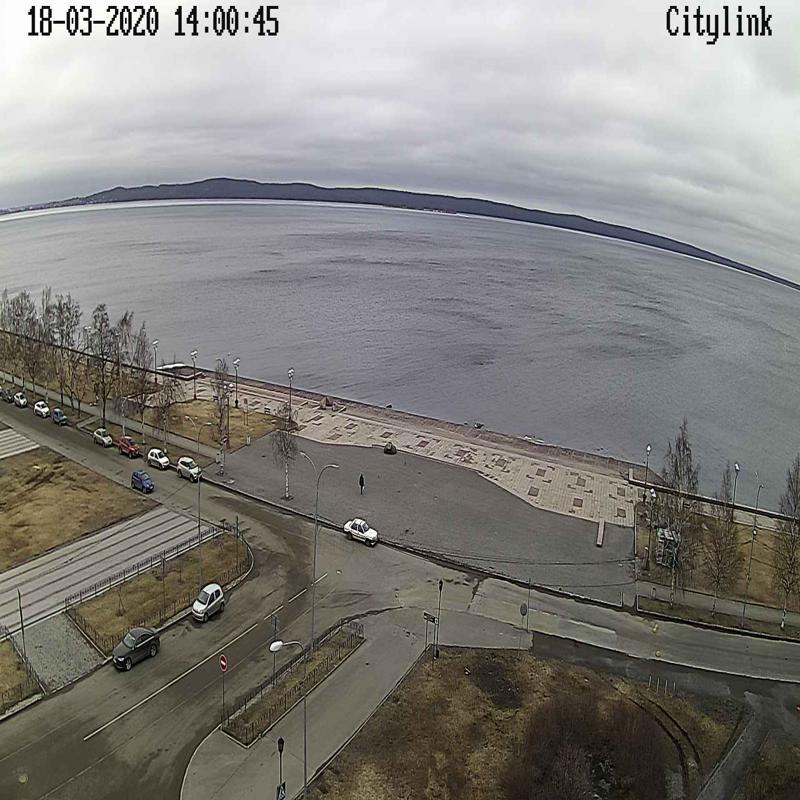

KeyboardInterrupt: ignored

In [ ]:
from IPython.display import Image
from IPython.display import display
from IPython.display import clear_output
import os
import time

for name in df[(df["month"] == 3) & (df["hour"].isin([10, 12, 14]))].name:
    print(pd.to_datetime(name[:-4]))
    display(Image(f"./data_resized/{name}"))
    time.sleep(1)
    clear_output()

In [ ]:
arr = []
for name in ["season", "year"]:
    arr.append(df[name].value_counts())
pd.DataFrame(arr).fillna("")

,1,2,3,4,2016,2017,2018,2019,2020,2021
season,4916,5022,5239,5148,,,,,,
year,,,,,3629,4252,3739,3903,4190,612


In [ ]:
from PIL import Image
from IPython.display import Image as show
image_file = Image.open("./data_resized/201607271400.jpg") # open colour image

image_file = image_file.convert('1') # convert image to black and white
image_file.save('result.png')
display(show('result.png'))